<a href="https://colab.research.google.com/github/ParishaKB/SM/blob/master/Emoji_Expression_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Facial Expression Recognition</h2>

### Task 1: Import Libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tensorflow version: 2.3.0


In [ ]:
from PIL import Image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


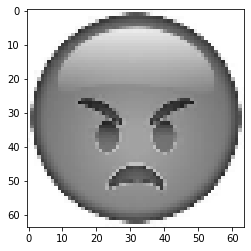

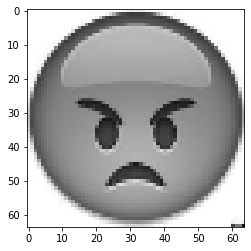

(24, 4096)
(24, 4096)
(24, 4096)
(24, 4096)


In [ ]:
import pandas as pd
#/content/gdrive/My Drive/expression/train
#/content/gdrive/My Drive/expression/test
import cv2
from google.colab.patches import cv2_imshow

#angry
xtrainangry = pd.DataFrame()
ytrainangry = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/emoji/train/angry"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (64,64), interpolation=cv2.INTER_LINEAR)
      if i <2:
        plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
        plt.show()
      filename1d = rav_resized.reshape(-1)
      xtrainangry["ImgAnger"+ str(i)] = filename1d
      ytrainangry["ImgAnger"+ str(i)] = (0,0)
      i = i+1
      
   
ytrainangry = ytrainangry.T
xtrainangry = xtrainangry.T
#print(xtrainsad.head())
print(xtrainangry.shape)


#happy
xtrainsmile = pd.DataFrame()
ytrainsmile = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/emoji/train/happy"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (64,64), interpolation=cv2.INTER_LINEAR)
      #plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
      #plt.show()
      filename1d = rav_resized.reshape(-1)
      xtrainsmile["ImgHappy"+ str(i)] = filename1d
      ytrainsmile["ImgHappy"+ str(i)] = (1,0)
      i = i+1
   
 
xtrainsmile = xtrainsmile.T
ytrainsmile = ytrainsmile.T
#print(xtrainsmile.head())
print(xtrainsmile.shape)

#sad
xtrainsad = pd.DataFrame()
ytrainsad = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/emoji/train/sad"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (64,64), interpolation=cv2.INTER_LINEAR)
      #plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
      #plt.show()
      filename1d = rav_resized.reshape(-1)
      xtrainsad["ImgSad"+ str(i)] = filename1d
      ytrainsad["ImgSad"+ str(i)] = (2,0)
      i = i+1
   
 
xtrainsad = xtrainsad.T
ytrainsad = ytrainsad.T
#print(xtrainsmile.head())
print(xtrainsad.shape)

#surprised

xtrainsurp = pd.DataFrame()
ytrainsurp = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/emoji/train/surprised"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (64,64), interpolation=cv2.INTER_LINEAR)
      #plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
      #plt.show()
      filename1d = rav_resized.reshape(-1)
      xtrainsurp["ImgSurp"+ str(i)] = filename1d
      ytrainsurp["ImgSurp"+ str(i)] = (3,0)
      i = i+1
   
 
xtrainsurp = xtrainsurp.T
ytrainsurp = ytrainsurp.T
#print(xtrainsmile.head())
print(xtrainsurp.shape)

In [ ]:
frames = [xtrainangry,xtrainsmile,xtrainsad,xtrainsurp]
train= pd.concat(frames)
print(train.head())
print(train.tail())
print(train.shape)

           0     1     2     3     4     ...  4091  4092  4093  4094  4095
ImgAnger0   255   255   255   255   255  ...   255   255   255   255   255
ImgAnger1   255   255   255   255   255  ...   255    66   123   120    20
ImgAnger2   255   255   255   255   255  ...   255   255   255   255   255
ImgAnger3   253   253   253   254   253  ...   251   255   246   255   254
ImgAnger4   254   254   254   254   254  ...   246   246   246   246   246

[5 rows x 4096 columns]
           0     1     2     3     4     ...  4091  4092  4093  4094  4095
ImgSurp19   255   255   255   255   255  ...   255   255   255   255   255
ImgSurp20   253   253   253   254   253  ...   251   255   246   255   254
ImgSurp21   253   253   253   254   253  ...   251   255   246   255   254
ImgSurp22   246   246   246   246   246  ...   246   246   246   246   246
ImgSurp23   255   255   255   255   255  ...    19    19    19    19    19

[5 rows x 4096 columns]
(96, 4096)


In [ ]:
frames = [ytrainangry,ytrainsmile,ytrainsad,ytrainsurp]
ytrain = pd.concat(frames)
ytrain = ytrain.drop([1], axis=1)

print(ytrain.head())
print(ytrain.tail())
print(ytrain.shape)

           0
ImgAnger0  0
ImgAnger1  0
ImgAnger2  0
ImgAnger3  0
ImgAnger4  0
           0
ImgSurp19  3
ImgSurp20  3
ImgSurp21  3
ImgSurp22  3
ImgSurp23  3
(96, 1)


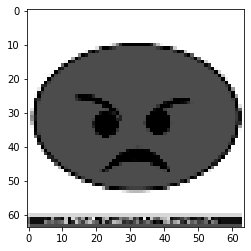

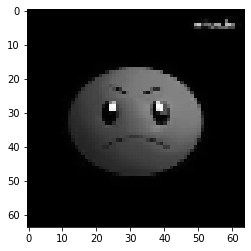

(6, 4096)
(6, 4096)
(6, 4096)
(6, 4096)


In [ ]:
#test
#angry
xtrainangry = pd.DataFrame()
ytrainangry = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/emoji/test/angry"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (64,64), interpolation=cv2.INTER_LINEAR)
      if i <2:
        plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
        plt.show()
      filename1d = rav_resized.reshape(-1)
      xtrainangry["ImgAnger"+ str(i)] = filename1d
      ytrainangry["ImgAnger"+ str(i)] = (0,0)
      i = i+1
      
   
ytrainangry = ytrainangry.T
xtrainangry = xtrainangry.T
#print(xtrainsad.head())
print(xtrainangry.shape)


#happy
xtrainsmile = pd.DataFrame()
ytrainsmile = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/emoji/test/happy"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (64,64), interpolation=cv2.INTER_LINEAR)
      #plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
      #plt.show()
      filename1d = rav_resized.reshape(-1)
      xtrainsmile["ImgHappy"+ str(i)] = filename1d
      ytrainsmile["ImgHappy"+ str(i)] = (1,0)
      i = i+1
   
 
xtrainsmile = xtrainsmile.T
ytrainsmile = ytrainsmile.T
#print(xtrainsmile.head())
print(xtrainsmile.shape)

#sad
xtrainsad = pd.DataFrame()
ytrainsad = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/emoji/test/sad"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (64,64), interpolation=cv2.INTER_LINEAR)
      #plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
      #plt.show()
      filename1d = rav_resized.reshape(-1)
      xtrainsad["ImgSad"+ str(i)] = filename1d
      ytrainsad["ImgSad"+ str(i)] = (2,0)
      i = i+1
   
 
xtrainsad = xtrainsad.T
ytrainsad = ytrainsad.T
#print(xtrainsmile.head())
print(xtrainsad.shape)

#surprised

xtrainsurp = pd.DataFrame()
ytrainsurp = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/emoji/test/surprised"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (64,64), interpolation=cv2.INTER_LINEAR)
      #plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
      #plt.show()
      filename1d = rav_resized.reshape(-1)
      xtrainsurp["ImgSurp"+ str(i)] = filename1d
      ytrainsurp["ImgSurp"+ str(i)] = (3,0)
      i = i+1
   
 
xtrainsurp = xtrainsurp.T
ytrainsurp = ytrainsurp.T
#print(xtrainsmile.head())
print(xtrainsurp.shape)

In [ ]:
frames = [xtrainangry,xtrainsmile,xtrainsad,xtrainsurp]
test= pd.concat(frames)
print(test.head())
print(test.tail())
print(test.shape)

           0     1     2     3     4     ...  4091  4092  4093  4094  4095
ImgAnger0   255   255   255   255   255  ...    77    77    77    77   255
ImgAnger1     0     0     0     0     0  ...     0     0     0     0     0
ImgAnger2   255   255   255   255   255  ...   255   255   255   255   255
ImgAnger3   255   255   255   255   255  ...   255   255   255   255   255
ImgAnger4   255   255   255   255   255  ...   255   255   255   255   255

[5 rows x 4096 columns]
          0     1     2     3     4     ...  4091  4092  4093  4094  4095
ImgSurp1   235   255   237   255   236  ...   239   253   239   254   239
ImgSurp2   245   245   245   245   245  ...   245   245   245   245   245
ImgSurp3   255   255   255   255   255  ...   255   255   255   255   255
ImgSurp4   254   255   255   255   255  ...   255   255   255   255   255
ImgSurp5   255   255   255   255   255  ...    19    19    19    19    19

[5 rows x 4096 columns]
(24, 4096)


In [ ]:
frames = [ytrainangry,ytrainsmile,ytrainsad,ytrainsurp]
ytest = pd.concat(frames)
ytest = ytest.drop([1], axis=1)

print(ytest.head())
print(ytest.tail())
print(ytest.shape)

           0
ImgAnger0  0
ImgAnger1  0
ImgAnger2  0
ImgAnger3  0
ImgAnger4  0
          0
ImgSurp1  3
ImgSurp2  3
ImgSurp3  3
ImgSurp4  3
ImgSurp5  3
(24, 1)


In [ ]:
print(train.shape)
print(ytrain.shape)
print(test.shape)
print(ytest.shape)

(96, 4096)
(96, 1)
(24, 4096)
(24, 1)


### Task 2 : PCA

In [ ]:
train = train/255.
test = test/255.

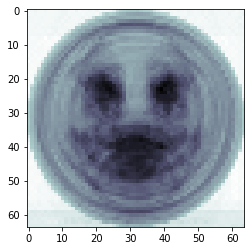

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(95)
pca1.fit(train)
plt.imshow(pca1.mean_.reshape(64,64),cmap=plt.cm.bone)

In [ ]:
print(pca1.components_.shape)

(95, 4096)


In [ ]:
#pca1.components_

In [ ]:
eigen_values = pca1.explained_variance_
#print(pca1.explained_variance_)

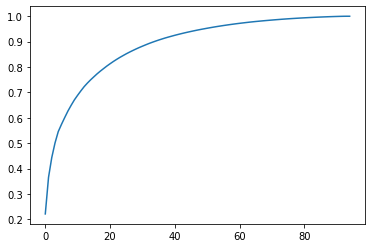

In [ ]:
import numpy as np
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

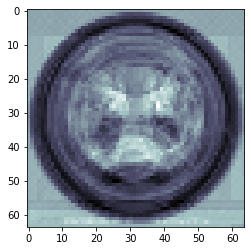

In [ ]:
plt.imshow(pca1.components_[0].reshape(64,64),cmap=plt.cm.bone)

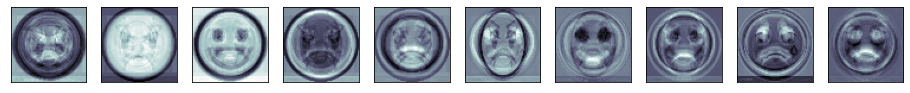

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(10):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca1.components_[i].reshape(64,64),cmap=plt.cm.bone)
#eigen face

In [ ]:
projectedtrain = pca1.fit_transform(train)  ##omega
print(projectedtrain.shape)

(96, 95)


In [ ]:
projectedtest = pca1.transform(test)  ##omega
print(projectedtest.shape)

(24, 95)


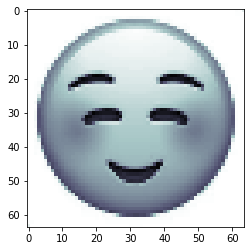

In [ ]:
#projected face
inv_proj3 = pca1.inverse_transform(projectedtrain)
plt.imshow(inv_proj3[33].reshape(64,64),cmap=plt.cm.bone)

### Task 3: Generate Training and Validation Batches

In [ ]:
x_train = projectedtrain
x_test = projectedtest
y_train = ytrain
y_test = ytest

y_train= pd.DataFrame (y_train)
y_test = pd.DataFrame(y_test)
y_train = y_train.astype('category')
y_test = y_test.astype('category')
y_train= pd.get_dummies (y_train)
y_test = pd.get_dummies(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
y_test

(96, 95)
(96, 4)
(24, 95)
(24, 4)


,0_0,0_1,0_2,0_3
ImgAnger0,1,0,0,0
ImgAnger1,1,0,0,0
ImgAnger2,1,0,0,0
ImgAnger3,1,0,0,0
ImgAnger4,1,0,0,0
ImgAnger5,1,0,0,0
ImgHappy0,0,1,0,0
ImgHappy1,0,1,0,0
ImgHappy2,0,1,0,0
ImgHappy3,0,1,0,0




### Task 4: Create NN Model

In [ ]:
from keras import models
from keras import layers

In [ ]:
nn=models.Sequential()

In [ ]:
nn.add(layers.Dense(1024,activation = "relu",input_shape=(95,))) 
nn.add(layers.Dense(512,activation='relu'))
nn.add(layers.Dense(512,activation='tanh'))
nn.add(layers.Dense(256,activation='relu'))
nn.add(layers.Dense(128,activation='relu'))
nn.add(layers.Dense(4,activation='softmax'))

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              98304     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 1,050,500
Trainable params: 1,050,500
Non-trainable params: 0
______________________________________________

In [ ]:
nn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
nn.fit(x_train,y_train,epochs=100,batch_size=10)

Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 1.6058 - accuracy: 0.3125
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8855 - accuracy: 0.7083
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.9375
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2221 - accuracy: 0.9271
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1078 - accuracy: 0.9479
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9896
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9896
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9896
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 4.4028e-04 - accuracy: 1.0000
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 1.6460e-04 - accuracy: 1.0000
E

In [ ]:
#step 6 evaluate test loss and test accuracy 
test_loss,test_accuracy = nn.evaluate(x_train,y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000


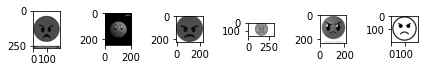

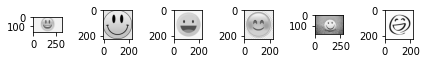

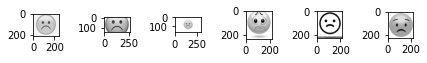

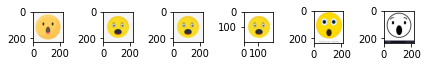

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#test
#angry
i = 1
source = "/content/gdrive/My Drive/emoji/test/angry"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      plt.subplot(1, 6, i ), plt.imshow(img, 'gray')
      i=i+1
plt.tight_layout() 
plt.show()
j = 1      
source = "/content/gdrive/My Drive/emoji/test/happy"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      plt.subplot(2, 6, j ), plt.imshow(img, 'gray')
      j=j+1
plt.tight_layout() 
plt.show()
k =1
source = "/content/gdrive/My Drive/emoji/test/sad"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      plt.subplot(3, 6, k ), plt.imshow(img, 'gray')
      k= k+1
plt.tight_layout() 
plt.show()
l = 1
source = "/content/gdrive/My Drive/emoji/test/surprised"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name))
      plt.subplot(4, 6, l ), plt.imshow(img, 'gray')
      l = l+1
 
plt.tight_layout() 
plt.show()

In [ ]:
predictions = np.argmax(nn.predict(x_test),axis = -1)
y_test_true =ytest.to_numpy().flatten()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_true, predictions)

array([[5, 0, 1, 0],
       [0, 0, 2, 4],
       [0, 2, 4, 0],
       [0, 0, 0, 6]])